In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [14]:
t_end = 10 # end of simulation
h = 0.001    # time step
t = np.arange(0, t_end, h, dtype=np.float64)   # time
dim = 2 # system dimension (size of the largest aggregate)
n = np.ndarray((dim, len(t)), dtype=np.float64) # number density
T = np.ndarray((dim, len(t)), dtype=np.float64) # temperature

# initial conditions
n0_0 = 1.0
n0_1 = 0.1
T0_0 = 10.0
T0_1 = 20.0

n[0][0] = n0_0
n[1][0] = n0_1
T[0][0] = T0_0
T[1][0] = T0_1

In [15]:
T.shape

(2, 10000)

In [16]:
# constant parameters
m1 = 1
m2 = 2*m1
mu, mu1, mu2 = m1*m2/(m1+m2), m1/(m1+m2), m2/(m1+m2)
s11 = np.power(m1,1/3)+np.power(m1,1/3)
s12 = np.power(m1,1/3)+np.power(m2,1/3)
s21 = np.power(m2,1/3)+np.power(m1,1/3)
s22 = np.power(m2,1/3)+np.power(m2,1/3)
eps = 0.1
g_agg2 = 0.1
g_frag2 = 0.9
Om = 0.01
eta = 0.1
g11, g12, g21, g22 = eps/2, np.sqrt(2)*eps/3, np.sqrt(2)*eps/3, eps/2

In [17]:
def dxdt(n1, n2, T1, T2):
    A11, R11, C11 = m1/T1, 0, 0.25*m1/T1
    A12, R12, C12 = m1/(2*T1)+m2/(2*T2), mu*(1/T2-1/T1), m1*m2/(2*T1*m2+2*T2*m1)
    A21, R21, C21 = m2/(2*T2)+m1/(2*T1), mu*(1/T1-1/T2), m2*m1/(2*T2*m1+2*T1*m2)
    A22, R22, C22 = m2/T2, 0, 0.25*m2/T2

    Q11, P11 = C11*g_agg2, C11*g_frag2
    Q12, P12 = C12*g_agg2, C12*g_frag2
    Q21, P21 = C21*g_agg2, C21*g_frag2
    Q22, P22 = C22*g_agg2, C22*g_frag2

    f_agg_11 = 0.5*Q11**2*np.exp(-Q11)/(1-(1+Q11)*np.exp(-Q11))
    f_agg_12 = 0.5*Q12**2*np.exp(-Q12)/(1-(1+Q12)*np.exp(-Q12))
    f_agg_21 = 0.5*Q21**2*np.exp(-Q21)/(1-(1+Q21)*np.exp(-Q21))
    f_agg_22 = 0.5*Q22**2*np.exp(-Q22)/(1-(1+Q22)*np.exp(-Q22))

    f_res_11 = (0.5*Q11**2*np.exp(-Q11)-P11*np.exp(-P11))/((1+Q11)*np.exp(-Q11)-np.exp(-P11))
    f_res_12 = (0.5*Q12**2*np.exp(-Q12)-P12*np.exp(-P12))/((1+Q12)*np.exp(-Q12)-np.exp(-P12))
    f_res_21 = (0.5*Q21**2*np.exp(-Q21)-P21*np.exp(-P21))/((1+Q21)*np.exp(-Q21)-np.exp(-P21))
    f_res_22 = (0.5*Q22**2*np.exp(-Q22)-P22*np.exp(-P22))/((1+Q22)*np.exp(-Q22)-np.exp(-P22))

    f1_fr_11 = R11**2*(2+P11)/(6*A11*C11)-2*g11*A11*(1+P11+P11**2)/(3*C11)
    f1_fr_12 = R12**2*(2+P12)/(6*A12*C12)-2*g12*A12*(1+P12+P12**2)/(3*C12)
    f1_fr_21 = R21**2*(2+P21)/(6*A21*C21)-2*g21*A21*(1+P21+P21**2)/(3*C21)

    f_fra_11 = (R11+2*mu1*A11)**2*(2+P11)/(6*A11*C11)
    f_fra_12 = (R12+2*mu2*A12)**2*(2+P12)/(6*A12*C12)
    f_fra_21 = (R21+2*mu1*A21)**2*(2+P21)/(6*A21*C21)
    f_fra_22 = (R22+2*mu2*A22)**2*(2+P22)/(6*A22*C22)

    G_agg_11_1 = (3*m1/(4*A11))*(1+R11**2*(1-f_agg_11)/(3*A11*C11))
    G_agg_11_2 = (3*m2/(4*A11))*(1+R11**2*(1-f_agg_11)/(3*A11*C11))
    G_agg_12_1 = (3*m1/(4*A12))*(1+R12**2*(1-f_agg_12)/(3*A12*C12))
    G_agg_12_2 = (3*m2/(4*A12))*(1+R12**2*(1-f_agg_12)/(3*A12*C12))
    G_agg_21_1 = (3*m1/(4*A21))*(1+R21**2*(1-f_agg_21)/(3*A21*C21))
    G_agg_21_2 = (3*m2/(4*A21))*(1+R21**2*(1-f_agg_21)/(3*A21*C21))
    G_agg_22_1 = (3*m1/(4*A22))*(1+R22**2*(1-f_agg_22)/(3*A22*C22))
    G_agg_22_2 = (3*m2/(4*A22))*(1+R22**2*(1-f_agg_22)/(3*A22*C22))

    L_agg_11_1 = (3*m1/(4*A11))*(1+(R11+2*mu1*A11)**2*(1-f_agg_11)/(3*A11*C11))
    L_agg_11_2 = (3*m2/(4*A11))*(1+(R11+2*mu1*A11)**2*(1-f_agg_11)/(3*A11*C11))
    L_agg_12_1 = (3*m1/(4*A12))*(1+(R12+2*mu2*A12)**2*(1-f_agg_12)/(3*A12*C12))
    L_agg_12_2 = (3*m2/(4*A12))*(1+(R12+2*mu2*A12)**2*(1-f_agg_12)/(3*A12*C12))
    L_agg_21_1 = (3*m1/(4*A21))*(1+(R21+2*mu1*A21)**2*(1-f_agg_21)/(3*A21*C21))
    L_agg_21_2 = (3*m2/(4*A21))*(1+(R21+2*mu1*A21)**2*(1-f_agg_21)/(3*A21*C21))
    L_agg_22_1 = (3*m1/(4*A22))*(1+(R22+2*mu2*A22)**2*(1-f_agg_22)/(3*A22*C22))
    L_agg_22_2 = (3*m2/(4*A22))*(1+(R22+2*mu2*A22)**2*(1-f_agg_22)/(3*A22*C22))

    L_res_11_1 = ((1-eps**2)*mu**2/(2*C11*m1)+(1+eps)*mu*R11/(2*A11*C11))*(1+f_res_11)
    L_res_11_2 = ((1-eps**2)*mu**2/(2*C11*m2)+(1+eps)*mu*R11/(2*A11*C11))*(1+f_res_11)
    L_res_12_1 = ((1-eps**2)*mu**2/(2*C12*m1)+(1+eps)*mu*R12/(2*A12*C12))*(1+f_res_12)
    L_res_12_2 = ((1-eps**2)*mu**2/(2*C12*m2)+(1+eps)*mu*R12/(2*A12*C12))*(1+f_res_12)
    L_res_21_1 = ((1-eps**2)*mu**2/(2*C21*m1)+(1+eps)*mu*R21/(2*A21*C21))*(1+f_res_21)
    L_res_21_2 = ((1-eps**2)*mu**2/(2*C21*m2)+(1+eps)*mu*R21/(2*A21*C21))*(1+f_res_21)
    L_res_22_1 = ((1-eps**2)*mu**2/(2*C22*m1)+(1+eps)*mu*R22/(2*A22*C22))*(1+f_res_22)
    L_res_22_2 = ((1-eps**2)*mu**2/(2*C22*m2)+(1+eps)*mu*R22/(2*A22*C22))*(1+f_res_22)

    G_fra_11_1 = (2/(4*np.pi))*(3*m1/(2*A11))*(1+f1_fr_11)
    G_fra_11_2 = (2/(4*np.pi))*(3*m2/(2*A11))*(1+f1_fr_11)
    G_fra_12_1 = (3/(4*np.pi))*(3*m1/(2*A12))*(1+f1_fr_12)
    G_fra_12_2 = (3/(4*np.pi))*(3*m2/(2*A12))*(1+f1_fr_12)
    G_fra_21_1 = (3/(4*np.pi))*(3*m1/(2*A21))*(1+f1_fr_21)
    G_fra_21_2 = (3/(4*np.pi))*(3*m2/(2*A21))*(1+f1_fr_21)
    G_fra_22_1 = (4/(4*np.pi))*(3*m1/(2*A22))
    G_fra_22_2 = (4/(4*np.pi))*(3*m2/(2*A22))

    L_fra_11_1 = (3*m1/(4*np.pi*A11))*(1+f_fra_11)
    L_fra_11_2 = (3*m2/(4*np.pi*A11))*(1+f_fra_11)
    L_fra_12_1 = (3*m1/(4*np.pi*A12))*(1+f_fra_12)
    L_fra_12_2 = (3*m2/(4*np.pi*A12))*(1+f_fra_12)
    L_fra_21_1 = (3*m1/(4*np.pi*A21))*(1+f_fra_21)
    L_fra_21_2 = (3*m2/(4*np.pi*A21))*(1+f_fra_21)
    L_fra_22_1 = (3*m1/(4*np.pi*A22))*(1+f_fra_22)
    L_fra_22_2 = (3*m2/(4*np.pi*A22))*(1+f_fra_22)

    K_11 = 2*s11**2*np.sqrt(2*np.pi*(T1/m1+T1/m1))
    K_12 = 2*s12**2*np.sqrt(2*np.pi*(T1/m1+T2/m2))
    K_21 = 2*s21**2*np.sqrt(2*np.pi*(T2/m1+T1/m1))
    K_22 = 2*s22**2*np.sqrt(2*np.pi*(T2/m2+T2/m2))

    K_agg_11 = K_11*(1-(1+Q11)*np.exp(-Q11))
    K_agg_12 = K_12*(1-(1+Q12)*np.exp(-Q12))
    K_agg_21 = K_21*(1-(1+Q21)*np.exp(-Q21))
    K_agg_22 = K_22*(1-(1+Q22)*np.exp(-Q22))

    K_res_11 = K_11*((1+Q11)*np.exp(-Q11)-np.exp(-P11))
    K_res_12 = K_12*((1+Q12)*np.exp(-Q12)-np.exp(-P12))
    K_res_21 = K_21*((1+Q21)*np.exp(-Q21)-np.exp(-P21))
    K_res_22 = K_22*((1+Q22)*np.exp(-Q22)-np.exp(-P22))

    K_fra_11 = K_11*np.exp(-P11)
    K_fra_12 = K_12*np.exp(-P12)
    K_fra_21 = K_21*np.exp(-P21)
    K_fra_22 = K_22*np.exp(-P22)

    dn1dt_avg = 0.5*K_fra_22*n2**2 + K_fra_12*n1*n2 - K_agg_11*n1**2
    dn2dt_avg = 0.5*K_agg_11*n1**2 - K_fra_12*n1*n2 - K_fra_22*n2**2
    dT1dt_avg = 0.5*K_fra_22*n2**2*G_fra_22_1+K_fra_12*n1*n2*G_fra_12_1-(K_agg_11*L_agg_11_1+K_res_11*L_res_11_1)*n1**2-K_res_12*L_res_12_1*n1*n2
    dT2dt_avg = 0.5*K_agg_11*n1**2*G_agg_11_2-(K_res_12*L_res_12_2+K_fra_12*L_fra_12_2)*n1*n2-(K_res_22*L_res_22_2+K_fra_22*L_fra_22_2)*n2**2

    dn1dt, dn2dt = dn1dt_avg, dn2dt_avg
    dT1dt = 3*Om**2*eta/n1 + dT1dt_avg - (T1/n1)*dn1dt
    dT2dt = 3*Om**2*eta/n2 + dT2dt_avg - (T2/n2)*dn2dt

    return (dn1dt, dn2dt, dT1dt, dT2dt, K_fra_11)

In [18]:
K_fra_11_list = np.ndarray(len(t), dtype=np.float64)
K_fra_11_list[0] = 2*s11**2*np.sqrt(2*np.pi*(2*T0_0/m1))*np.exp(-0.25*(m1/T0_0)*g_frag2)
for k in range(0,len(t)-1):
    n1, n2 = n[0][k], n[1][k]
    T1, T2 = T[0][k], T[1][k]
    dn1dt, dn2dt, dT1dt, dT2dt, K = dxdt(n1, n2, T1, T2)
    n[0][k+1] = n1 + h*dn1dt
    n[1][k+1] = n2 + h*dn2dt
    T[0][k+1] = T1 + h*dT1dt
    T[1][k+1] = T2 + h*dT2dt
    K_fra_11_list[k+1] = K

/tmp/ipykernel_8197/1776572083.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  f_agg_12 = 0.5*Q12**2*np.exp(-Q12)/(1-(1+Q12)*np.exp(-Q12))
/tmp/ipykernel_8197/1776572083.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  f_agg_21 = 0.5*Q21**2*np.exp(-Q21)/(1-(1+Q21)*np.exp(-Q21))
/tmp/ipykernel_8197/1776572083.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  f_agg_22 = 0.5*Q22**2*np.exp(-Q22)/(1-(1+Q22)*np.exp(-Q22))
/tmp/ipykernel_8197/1776572083.py:37: RuntimeWarning: invalid value encountered in scalar multiply
  G_agg_22_1 = (3*m1/(4*A22))*(1+R22**2*(1-f_agg_22)/(3*A22*C22))
/tmp/ipykernel_8197/1776572083.py:38: RuntimeWarning: invalid value encountered in scalar multiply
  G_agg_22_2 = (3*m2/(4*A22))*(1+R22**2*(1-f_agg_22)/(3*A22*C22))
/tmp/ipykernel_8197/1776572083.py:76: RuntimeWarning: invalid value encountered in sqrt
  K_11 = 2*s11**2*np.sqrt(2*np.pi*(T1/m1+T1/m1))


In [19]:
K_fra_11_list

array([87.68459354, 87.68459354, 87.34095739, ...,         nan,
               nan,         nan])

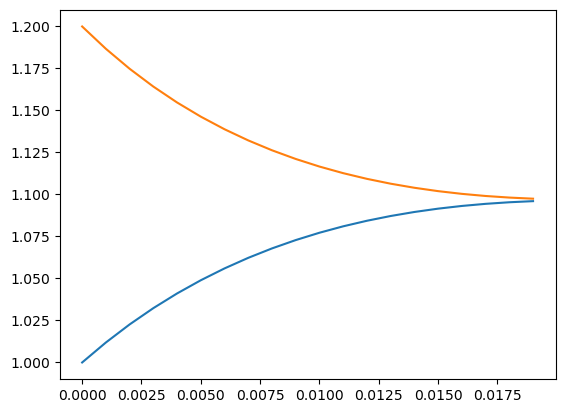

In [10]:
plt.plot(t[:20],n[0][:20])
plt.plot(t[:20],2*n[1][:20]+n[0][:20])

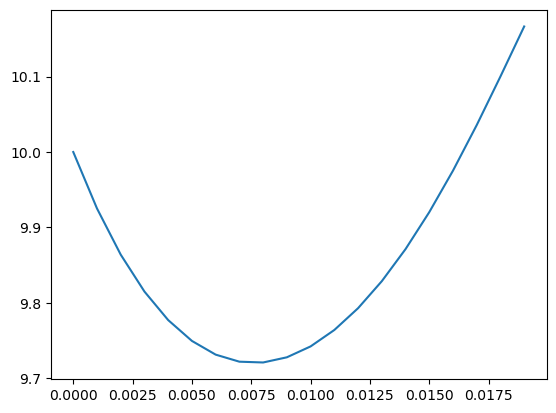

In [11]:
plt.plot(t[:20],T[0][:20])
#plt.plot(t[:20],T[1][:20])

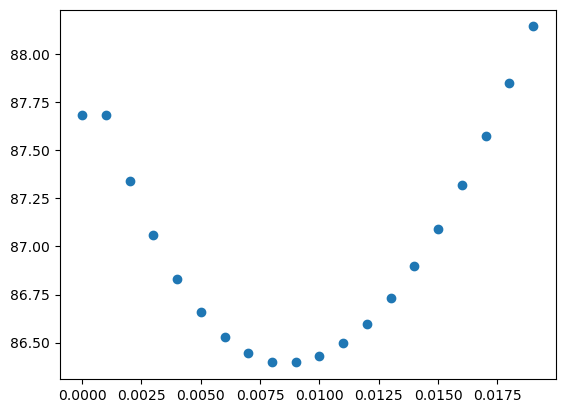

In [21]:
plt.plot(t[:20],K_fra_11_list[:20],'o')